# Coronavirus

### Load python tools

In [1]:
import pandas as pd
import geopandas as gpd
import jenkspy
import matplotlib.pyplot as plt
%matplotlib inline
import json
import numpy as np
from altair import datum
import altair as alt
import altair_latimes as lat
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')
pd.options.display.max_columns = 50
pd.options.display.max_rows = 1000
alt.data_transformers.disable_max_rows()
from selenium import webdriver
driver = webdriver.Chrome(executable_path='/Users/mhustiles/Desktop/chromedriver')

### Hospital building characteristics

In [2]:
#https://data.chhs.ca.gov/dataset/hospital-building-data
#Metadata: https://data.chhs.ca.gov/dataset/hospital-building-data/resource/cefc10e5-5071-4ca4-8b03-2249caf0d294
buildings = pd.read_csv('input/ca-oshpd-gachospital-building-03052020.csv', encoding='Latin-1',\
                        dtype={'year_completed': object, 'building_code_year': object, 'stories': int,\
                               'height_ft': int}).fillna('')

In [3]:
buildings.columns = buildings.columns.str.strip().str.lower().str.replace(' ', '_')\
                    .str.replace('(', '').str.replace(')', '').str.replace('-','_')

In [ ]:
buildings.head()

In [ ]:
buildings_geo = gpd.GeoDataFrame(
    buildings, geometry=gpd.points_from_xy(buildings.longitude, buildings.latitude))

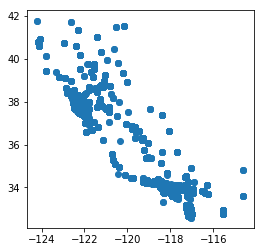

In [89]:
buildings_geo.plot()

--- 

### Facility listing

In [5]:
#https://data.chhs.ca.gov/dataset/healthcare-facility-locations/resource/0a0476ba-442c-40ff-97dc-dc840fa7e907
facilities = pd.read_excel('input/healthcare_facility_locations.xlsx')

In [6]:
facilities.columns = facilities.columns.str.strip().str.lower().str.replace(' ', '_')\
                    .str.replace('(', '').str.replace(')', '').str.replace('-','_')

In [ ]:
facilities_geo = gpd.GeoDataFrame(
    facilities, geometry=gpd.points_from_xy(facilities.longitude, facilities.latitude))

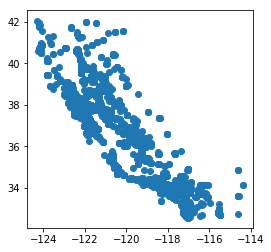

In [92]:
facilities_geo.plot()

In [93]:
hospitals = facilities_geo[facilities_geo['fac_type_code'] == 'GACH']

In [96]:
hospitals['entity_type_description'].value_counts()

NONPROFIT CORP               215
LIMITED LIABILITY COMPANY     65
PROFIT CORP                   49
HEALTH CARE DISTRICT          34
PARTNERSHIP                   19
COUNTY                        17
UC REGENT                      9
OTHER PUBLIC AGENCY            5
STATE AGENCY                   1
INDIVIDUAL                     1
CITY                           1
Name: entity_type_description, dtype: int64

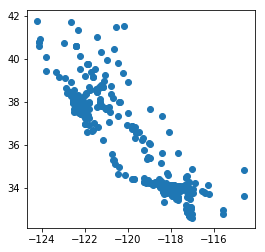

In [97]:
hospitals.plot()

In [9]:
public_list = ['COUNTY','UC REGENT','OTHER PUBLIC AGENCY','CITY','STATE AGENCY']

In [10]:
public = hospitals[hospitals['entity_type_description'].isin(public_list)]

In [11]:
public.to_csv('output/public_hospitals_from_chhs.csv')

In [12]:
public.contact_email.tolist()

['LTNAVARRA@UCDAVIS.EDU',
 'INFO@SJGH.ORG',
 nan,
 'DFINLEY@DHS.LACOUNTY.GOV',
 'LZMARTINEZ@DHS.LACOUNTY.GOV',
 nan,
 'DCASTILLO@DHS.LACOUNTY.GOV',
 'DBOURGET@UCI.EDU',
 'LICENSINGANDCERTIFICATION@NATIVIDAD.COM',
 'PATRYAN@VERITY.ORG',
 'HOSPITAL.ADMIN@HHS.SCCGOV.ORG',
 'CORRIERUDD@VERIFY.ORG',
 'ADOLPHE.EDWARD@ECRMC.ORG',
 'POLSEN@UCSD.EDU',
 nan,
 'RON.EYRAUD@KERNMEDICAL.COM',
 'RISKMANAGEMENT@ALAMEDAHEALTHSYSTEM.ORG',
 nan,
 'ADALY@ACMEDCTR.ORG',
 'JASPREET.BENEPAL@CCHEALTH.ORG',
 nan,
 'CKUNNAPPILLY@SMCGOV.ORG',
 nan,
 nan,
 nan,
 nan,
 'HOGGANE@ARMC.SBCOUNTY.GOV',
 nan,
 nan,
 'JAJACKSON@ACMEDCTR.ORG',
 nan,
 'PWATKINS@MEDNET.UCLA.EDU',
 'MBWILLIS@MEDNET.UCLA.EDU']

---

### CDC testing capacity

In [55]:
tables = pd.read_html("https://www.cdc.gov/coronavirus/2019-ncov/testing-in-us.html")
tables = pd.DataFrame(tables[0])

In [56]:
tables.columns = tables.columns.str.strip().str.lower().str.replace(' ', '_')\
                    .str.replace('(', '').str.replace(')', '').str.replace('-','_')

In [57]:
tables.rename(columns={"us_public_health_labs": "US Public Health Labs",\
                   "cdc_labs": "CDC Labs", 'date_collected':'Date'}, inplace=True)

In [58]:
tables['Date'] = pd.to_datetime(tables['Date'] + '/2020')

In [59]:
# tables = tables[tables['date_collected'] <= '2020/03/08']

In [61]:
tables_melt = pd.melt(tables, id_vars=['Date'], value_vars=['US Public Health Labs', 'CDC Labs'],
        var_name='lab_type', value_name='test_count')

In [62]:
tables.to_csv('output/cdc_testing_table.csv')
tables_melt.to_csv('output/cdc_testing_table_melt.csv')

In [63]:
tables_melt['test_count'] = tables_melt['test_count'].str.replace('‡','').astype(int)

In [64]:
tables_melt

,Date,lab_type,test_count
0,2020-01-18,US Public Health Labs,0
1,2020-01-19,US Public Health Labs,0
2,2020-01-20,US Public Health Labs,0
3,2020-01-21,US Public Health Labs,0
4,2020-01-22,US Public Health Labs,0
5,2020-01-23,US Public Health Labs,0
6,2020-01-24,US Public Health Labs,0
7,2020-01-25,US Public Health Labs,0
8,2020-01-26,US Public Health Labs,0
9,2020-01-27,US Public Health Labs,0


In [83]:
chart = alt.Chart(tables_melt).mark_bar(size=12).encode(
    x=alt.X('Date:T', title='Date', axis=alt.Axis(tickCount=10)),
    y=alt.Y('sum(test_count)', title=''),
    color=alt.Color('lab_type', legend=alt.Legend(orient="top"), title=''),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'lab_type',
      sort='ascending'
    )
).properties(width=800, title={
      "text": ["CDC: Daily U.S. coronavirus specimens tested, by lab type"], 
      "subtitle": ["March 8-12 figures reported as 'pending'"],
      "color": "black",
      "subtitleColor": "gray"})
  

In [85]:
chart

alt.Chart(...)

In [86]:
chart.save('visualization.png')

In [87]:
chart.save('visualization.svg')

---

### Johns Hopkins data

In [82]:
# Cases: 
# https://services1.arcgis.com/0MSEUqKaxRlEPj5g/ArcGIS/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/1

# Deaths: 
# https://services1.arcgis.com/0MSEUqKaxRlEPj5g/ArcGIS/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/0

# Cases countries: 
# https://services1.arcgis.com/0MSEUqKaxRlEPj5g/ArcGIS/rest/services/Coronavirus_2019_nCoV_Cases/FeatureServer/2

# Cases/time: 
# https://services1.arcgis.com/0MSEUqKaxRlEPj5g/ArcGIS/rest/services/cases_time_v3/FeatureServer/0